In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [3]:
import os

# Define the path to the dataset directory
dataset_path = "C:/Users/kship/Desktop/Dataset_BUSI_with_GT"

# Get the list of image files
image_files = []
labels = []

# Iterate over the directories
for class_name in ['benign', 'malignant', 'normal']:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image_files.append(image_path)
        labels.append(class_name)

# Convert labels to numerical values
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
# Get the original class labels from the label encoder
original_labels = label_encoder.classes_

# Convert labels to one-hot encoded format
labels = to_categorical(labels)


# Print the mapping between numerical values and original labels
for numerical_value, original_label in enumerate(original_labels):
    print(f"Numerical Value: {numerical_value}, Original Label: {original_label}")

print('Done')

Numerical Value: 0, Original Label: benign
Numerical Value: 1, Original Label: malignant
Numerical Value: 2, Original Label: normal
Done


In [4]:
print(labels.shape)
print(len(image_files))

(1578, 3)
1578


In [5]:
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.3, random_state=42, stratify=labels)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1104 1104
474 474


In [6]:
# Define a function to load and preprocess the images
def load_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((150, 150))
#this converts the image to BW
    image = image.convert('L') 
    image = np.array(image)
    image = image.reshape((150, 150, 1))
#image normalization
    image = image.astype('float32') / 255.0
    return image

X_train = [str(image_path) for image_path in X_train]
X_test = [str(image_path) for image_path in X_test]

# Load and preprocess the training images and labels
X_train = [load_preprocess_image(image_path) for image_path in X_train]
X_train = np.array(X_train)
y_train= np.array(y_train)

# Load and preprocess the testing images and labels
X_test= [load_preprocess_image(image_path) for image_path in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)

(1104, 150, 150, 1) (1104, 3)
(474, 150, 150, 1) (474, 3)


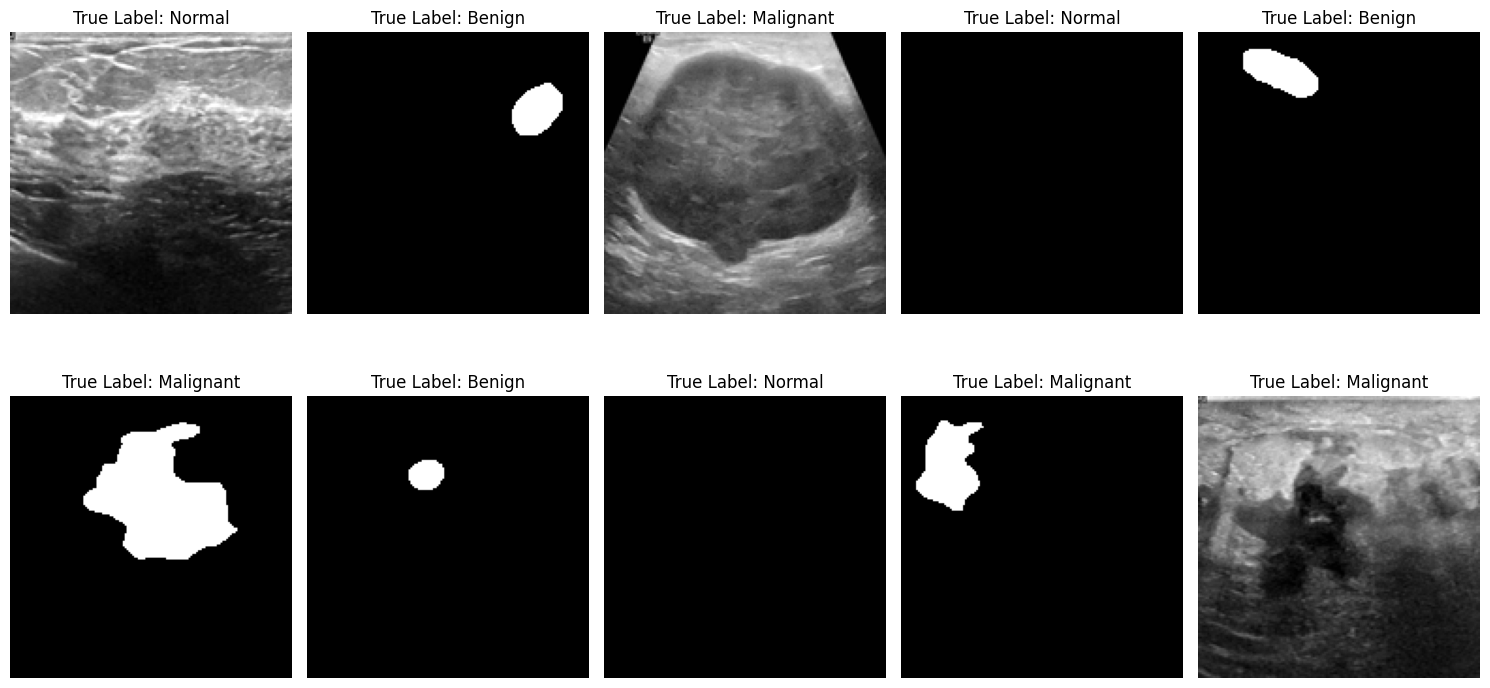

In [7]:
#Check size and color channels of images and labels
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

#Show images
images = X_test[:10]  # Assuming X_test contains the image data
labels = y_test[:10]  # Assuming y_test contains the corresponding labels

# Convert them to class indices
class_indices = np.argmax(labels, axis=1)

# Define class labels 
class_labels = ['Benign', 'Malignant', 'Normal']

num_rows = 2
num_cols = len(images) // num_rows

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Display images with labels in the subplots
for i in range(len(images)):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')  # Assuming images are 2D arrays (grayscale)
    ax.set_title(f'True Label: {class_labels[class_indices[i]]}')
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show() 

In [8]:
# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add more convolutional layers
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback to monitor accuracy
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)

# Train the model
#model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.1)
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_split=0.1, callbacks=[early_stopping]) 

Epoch 1/15
32/32 [==============================] - 56s 2s/step - loss: 0.9352 - accuracy: 0.5539 - val_loss: 0.9366 - val_accuracy: 0.4955
Epoch 2/15
32/32 [==============================] - 10s 328ms/step - loss: 0.8138 - accuracy: 0.6395 - val_loss: 0.6929 - val_accuracy: 0.7027
Epoch 3/15
32/32 [==============================] - 10s 324ms/step - loss: 0.7287 - accuracy: 0.6727 - val_loss: 0.6087 - val_accuracy: 0.7117
Epoch 4/15
32/32 [==============================] - 10s 326ms/step - loss: 0.6626 - accuracy: 0.6939 - val_loss: 0.6418 - val_accuracy: 0.7297
Epoch 5/15
32/32 [==============================] - 10s 325ms/step - loss: 0.6018 - accuracy: 0.7231 - val_loss: 0.6037 - val_accuracy: 0.7748
Epoch 6/15
32/32 [==============================] - 10s 328ms/step - loss: 0.5568 - accuracy: 0.7533 - val_loss: 0.6250 - val_accuracy: 0.7748
Epoch 7/15
32/32 [==============================] - 11s 332ms/step - loss: 0.5513 - accuracy: 0.7623 - val_loss: 0.6916 - val_accuracy: 0.7207


In [9]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Training Accuracy:', train_accuracy,"Train loss",train_loss)
print('Testing Accuracy:', test_accuracy,"Test Loss",test_loss)



Training Accuracy: 0.7545289993286133 Train loss 0.5247840881347656
Testing Accuracy: 0.7130801677703857 Test Loss 0.6142226457595825


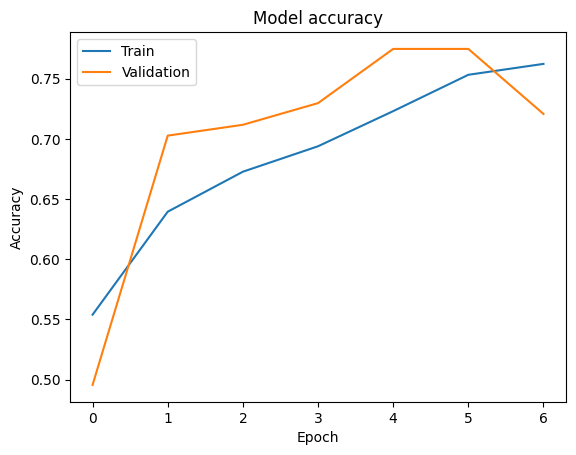

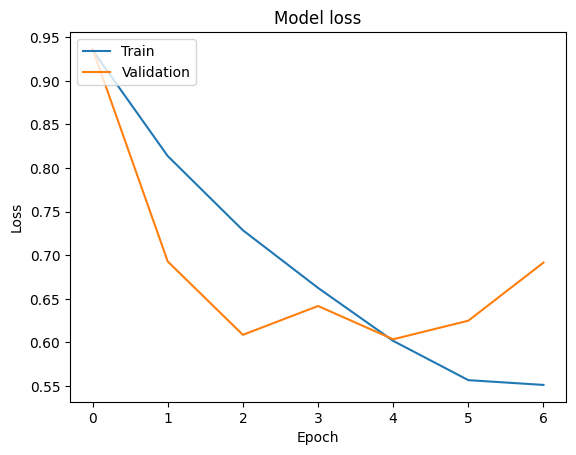

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()